## Obtain the data


### Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
d1 = pd.read_csv('london_weather.csv')

In [3]:
d1.head()

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0

### Scrub the data

In [4]:
d2 = d1.drop(['date','max_temp','min_temp'],axis='columns')
d2.head()

cloud_cover  sunshine  global_radiation  mean_temp  precipitation  \
0          2.0       7.0              52.0       -4.1            0.4   
1          6.0       1.7              27.0       -2.6            0.0   
2          5.0       0.0              13.0       -2.8            0.0   
3          8.0       0.0              13.0       -2.6            0.0   
4          6.0       2.0              29.0       -0.8            0.0   

   pressure  snow_depth  
0  101900.0         9.0  
1  102530.0         8.0  
2  102050.0         4.0  
3  100840.0         2.0  
4  102250.0         1.0

In [5]:
df2 = d2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   mean_temp         15305 non-null  float64
 4   precipitation     15335 non-null  float64
 5   pressure          15337 non-null  float64
 6   snow_depth        13900 non-null  float64
dtypes: float64(7)
memory usage: 839.1 KB


In [6]:
df2.describe()

cloud_cover      sunshine  global_radiation     mean_temp  \
count  15322.000000  15341.000000      15322.000000  15305.000000   
mean       5.268242      4.350238        118.756951     11.475511   
std        2.070072      4.028339         88.898272      5.729709   
min        0.000000      0.000000          8.000000     -7.600000   
25%        4.000000      0.500000         41.000000      7.000000   
50%        6.000000      3.500000         95.000000     11.400000   
75%        7.000000      7.200000        186.000000     16.000000   
max        9.000000     16.000000        402.000000     29.000000   

       precipitation       pressure    snow_depth  
count   15335.000000   15337.000000  13900.000000  
mean        1.668634  101536.605594      0.037986  
std         3.738540    1049.722604      0.545633  
min         0.000000   95960.000000      0.000000  
25%         0.000000  100920.000000      0.000000  
50%         0.000000  101620.000000      0.000000  
75%         1.600000  102240.000000      0.000000  
max        61.800000  104820.000000     22.000000

In [7]:
df2.shape

(15341, 7)

In [8]:
df2.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'mean_temp',
       'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [9]:
df2.isna().sum()

cloud_cover           19
sunshine               0
global_radiation      19
mean_temp             36
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [10]:
df2 = df2.dropna()
df2.isnull().sum()

cloud_cover         0
sunshine            0
global_radiation    0
mean_temp           0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [11]:
df2.head()

cloud_cover  sunshine  global_radiation  mean_temp  precipitation  \
0          2.0       7.0              52.0       -4.1            0.4   
1          6.0       1.7              27.0       -2.6            0.0   
2          5.0       0.0              13.0       -2.8            0.0   
3          8.0       0.0              13.0       -2.6            0.0   
4          6.0       2.0              29.0       -0.8            0.0   

   pressure  snow_depth  
0  101900.0         9.0  
1  102530.0         8.0  
2  102050.0         4.0  
3  100840.0         2.0  
4  102250.0         1.0

In [12]:
#  features and target variable
X = df2[['cloud_cover', 'sunshine', 'global_radiation', 'precipitation', 'pressure', 'snow_depth']]
y = df2['mean_temp']

### Model and Interact

### Linear Regressor

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
# Create a linear regression model
model = LinearRegression()

In [15]:
# Fit the model to the entire dataset
model.fit(X, y)


LinearRegression()

In [16]:
model.score(X,y)

0.49516782547322113

In [17]:

predictions = model.predict(X)

In [18]:
mae = mean_absolute_error(y, predictions)
print("MAE:", mae)

MAE: 3.250821229807657


In [19]:
# Calculate RMSE
rmse = mean_squared_error(y, predictions, squared=False)
print("RMSE:", rmse)

RMSE: 4.050456861348315


In [20]:
# Calculate R2 score
r2 = r2_score(y, predictions)
print("R2 score:", r2)

R2 score: 0.49516782547322113


In [21]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = model.predict(input)[0]

  return str(prediction)

In [22]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-5.36726353705788'

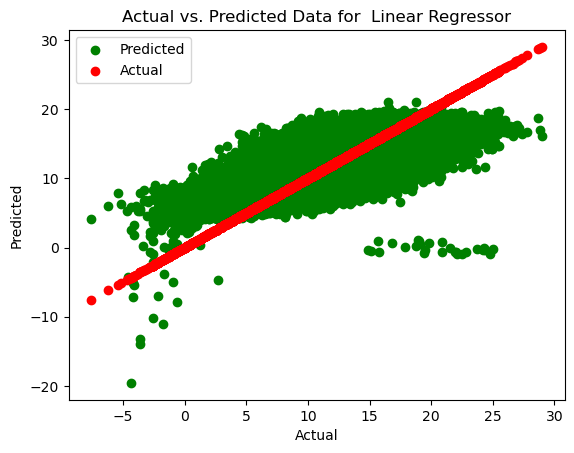

In [23]:
import matplotlib.pyplot as plt


plt.scatter(y, predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Linear Regressor')


plt.legend()


plt.show()


### Linear Regressor Using Parameter

In [24]:
modellp = LinearRegression(fit_intercept=True, normalize=False)

In [25]:
# Fit the model to the entire dataset
modellp.fit(X, y)


/opt/conda_envs/python38/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [26]:
modellp.score(X,y)

0.49516782547322113

In [27]:

predictionslp = modellp.predict(X)

In [28]:
mae = mean_absolute_error(y, predictionslp)
print("MAE:", mae)

MAE: 3.250821229807657


In [29]:
# Calculate RMSE
rmse = mean_squared_error(y, predictionslp)
print("RMSE:", rmse)

RMSE: 16.40620078564364


In [30]:
# Calculate R2 score
r2 = r2_score(y, predictionslp)
print("R2 score:", r2)

R2 score: 0.49516782547322113


In [31]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = modellp.predict(input)[0]

  return str(prediction)

In [32]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-5.36726353705788'

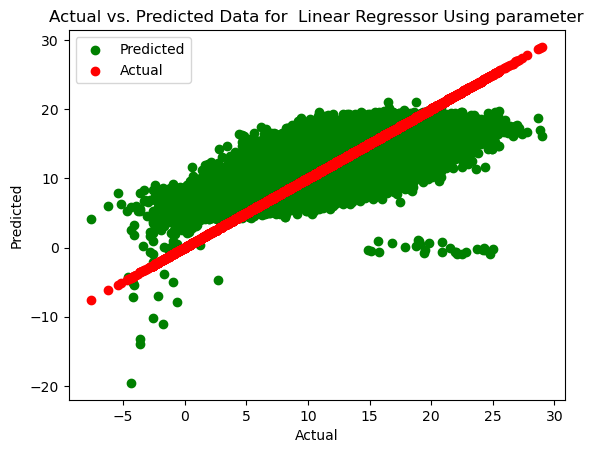

In [33]:
import matplotlib.pyplot as plt


plt.scatter(y, predictionslp, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Linear Regressor Using parameter')


plt.legend()


plt.show()


### Random Forest Without Parameter

In [34]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
modelrp = RandomForestRegressor()

In [35]:
# Fit the model to the entire dataset
modelrp.fit(X, y)


RandomForestRegressor()

In [36]:
modelrp.score(X,y)

0.9358846949895818

In [37]:
predictionsrp = modelrp.predict(X)

In [38]:
mae = mean_absolute_error(y, predictionsrp)
print("MAE:", mae)

MAE: 1.1420094354604757


In [39]:
# Calculate RMSE
rmse = mean_squared_error(y, predictionsrp)
print("RMSE:", rmse)

RMSE: 2.0836401095467543


In [40]:
# Calculate R2 score
r2 = r2_score(y, predictionsrp)
print("R2 score:", r2)

R2 score: 0.9358846949895818


In [41]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = modelrp.predict(input)[0]

  return str(prediction)

In [42]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-3.407000000000001'

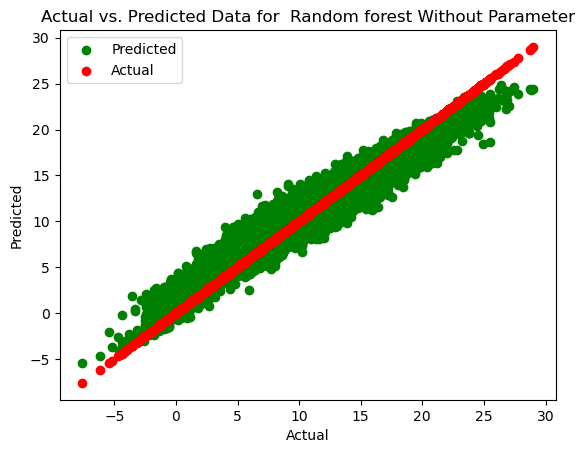

In [43]:
import matplotlib.pyplot as plt


plt.scatter(y, predictionsrp, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Random forest Without Parameter')


plt.legend()


plt.show()


### Random Forest With Parameter

In [44]:
Regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [45]:
# Fit the model to the entire dataset
Regressor.fit(X, y)


RandomForestRegressor(random_state=0)

In [46]:
Regressor.score(X,y)

0.9357081361834918

In [47]:
predict = Regressor.predict(X)

In [48]:
mae = mean_absolute_error(y, predict)
print("MAE:", mae)

MAE: 1.1438330002614352


In [49]:
# Calculate RMSE
rmse = mean_squared_error(y, predict)
print("RMSE:", rmse)

RMSE: 2.08937797525609


In [50]:
# Calculate R2 score
r2 = r2_score(y, predict)
print("R2 score:", r2)

R2 score: 0.9357081361834918


In [51]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = Regressor.predict(input)[0]

  return str(prediction)

In [52]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-3.4570000000000034'

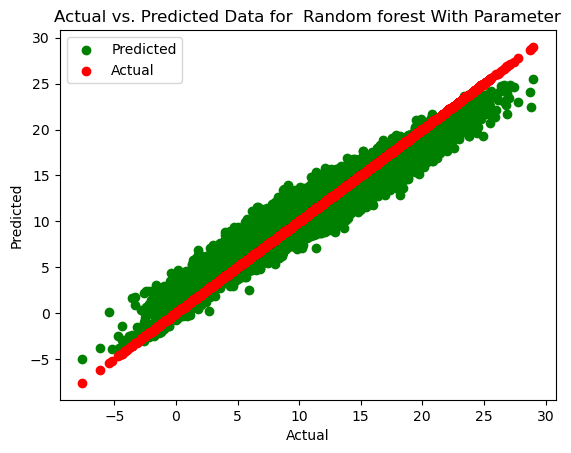

In [53]:
import matplotlib.pyplot as plt


plt.scatter(y, predict, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Random forest With Parameter')


plt.legend()


plt.show()


### Decision Tree Without Parameter

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
tree = DecisionTreeRegressor()

In [56]:
# Fit the model to the entire dataset
tree.fit(X, y)


DecisionTreeRegressor()

In [57]:
tree.score(X,y)

0.9996548443520936

In [58]:
pre = tree.predict(X)

In [59]:
mae = mean_absolute_error(y, pre)
print("MAE:", mae)

MAE: 0.0051482096847985746


In [60]:
# Calculate RMSE
rmse = mean_squared_error(y, pre)
print("RMSE:", rmse)

RMSE: 0.011216980904909824


In [61]:
# Calculate R2 score
r2 = r2_score(y, pre)
print("R2 score:", r2)

R2 score: 0.9996548443520936


In [62]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = tree.predict(input)[0]

  return str(prediction)

In [63]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-4.1'

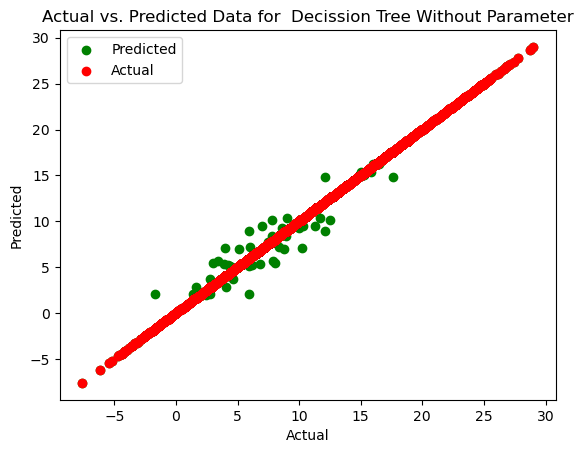

In [64]:
import matplotlib.pyplot as plt


plt.scatter(y, pre, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Decission Tree Without Parameter')


plt.legend()


plt.show()


### Decision Tree With Parameter

In [65]:
trees = DecisionTreeRegressor(max_depth=3)

In [66]:
# Fit the model to the entire dataset
trees.fit(X, y)


DecisionTreeRegressor(max_depth=3)

In [67]:
trees.score(X,y)

0.4540741077336129

In [68]:
pr = trees.predict(X)

In [69]:
mae = mean_absolute_error(y, pr)
print("MAE:", mae)

MAE: 3.3681374260203554


In [70]:
# Calculate RMSE
rmse = mean_squared_error(y, pr)
print("RMSE:", rmse)

RMSE: 17.74167783778786


In [71]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = trees.predict(input)[0]

  return str(prediction)

In [72]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-2.3454545454545457'

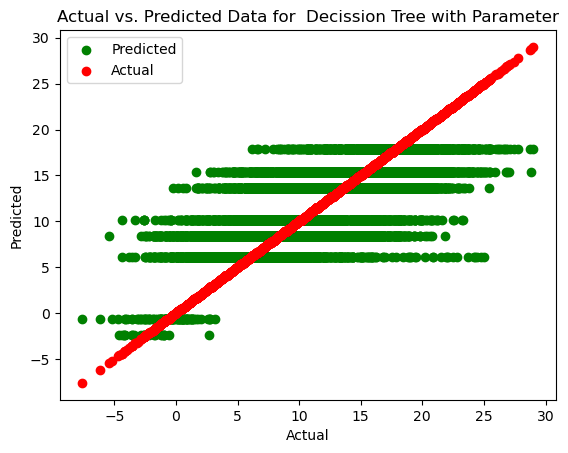

In [73]:
import matplotlib.pyplot as plt


plt.scatter(y, pr, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Decission Tree with Parameter')


plt.legend()


plt.show()


### CNN model

In [74]:
import tensorflow as tf
cnn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(1)
])


2023-05-09 17:14:40.016257: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 17:14:40.017856: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [75]:
cnn.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Train the model on the entire dataset
history = cnn.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
347/347 [==============================] - 1s 2ms/step - loss: 516898.6250 - val_loss: 38.0968
Epoch 2/50
347/347 [==============================] - 1s 2ms/step - loss: 33.3657 - val_loss: 35.0927
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 28.5047 - val_loss: 30.9346
Epoch 4/50
347/347 [==============================] - 1s 2ms/step - loss: 25.2868 - val_loss: 24.4117
Epoch 5/50
347/347 [==============================] - 1s 2ms/step - loss: 23.0170 - val_loss: 23.2005
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 21.8344 - val_loss: 26.7574
Epoch 7/50
347/347 [==============================] - 1s 2ms/step - loss: 21.8067 - val_loss: 20.9724
Epoch 8/50
347/347 [==============================] - 1s 2ms/step - loss: 21.6963 - val_loss: 21.4197
Epoch 9/50
347/347 [==============================] - 0s 1ms/step - loss: 24.1445 - val_loss: 32.6422
Epoch 10/50
347/347 [==============================] - 1s 2ms/step - loss: 23.

In [77]:

loss = cnn.evaluate(X, y)
print("Test loss:", loss)

433/433 [==============================] - 1s 1ms/step - loss: 243.1646
Test loss: 243.16461181640625


In [78]:
# Evaluate the model on the entire dataset
loss = cnn.evaluate(X, y)
rmse = np.sqrt(loss)
print("RMSE:", rmse)

433/433 [==============================] - 1s 1ms/step - loss: 243.1646
RMSE: 15.593736300720435


In [79]:
 new= cnn.predict(X)

In [80]:
mae = mean_absolute_error(y, new)
print("MAE:", mae)

MAE: 15.054354495351015


In [81]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = cnn.predict(input)[0]

  return str(prediction)

In [82]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'[-18.708654]'

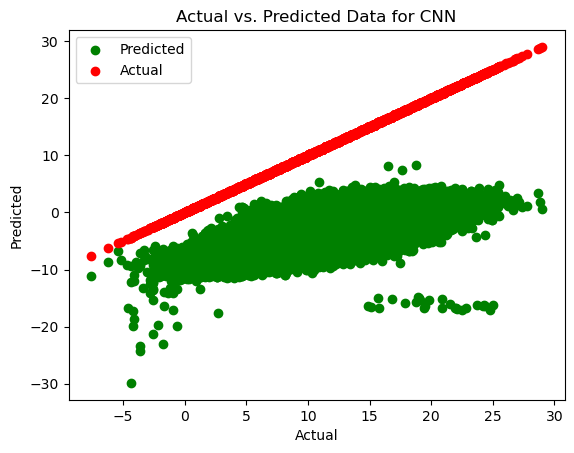

In [83]:
import matplotlib.pyplot as plt


plt.scatter(y, new, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for CNN')


plt.legend()


plt.show()


### Adaboost Algorithm

In [84]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X, y)
adaboost_reg.score(X,y)

0.5044358563521222

In [85]:
adaboost_predictions = adaboost_reg.predict(X)
mae = mean_absolute_error(y, adaboost_predictions)
print("MAE:", mae)
# Calculate RMSE
rmse = mean_squared_error(y, adaboost_predictions)
print("RMSE:", rmse)

MAE: 3.279270946225385
RMSE: 16.10500529304389


In [86]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = adaboost_reg.predict(input)[0]

  return str(prediction)

In [87]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'4.115781637717105'

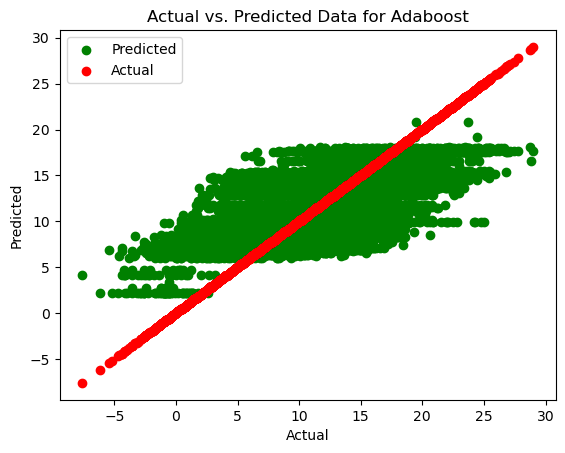

In [88]:
import matplotlib.pyplot as plt


plt.scatter(y, adaboost_predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for Adaboost')


plt.legend()


plt.show()


### Ensemble Model

In [89]:

from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error



linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
adaboost_reg = AdaBoostRegressor()
svm_reg = SVR(kernel='linear')



# Create the ensemble model
ensemble_model = VotingRegressor([
    ('linear', linear_reg),
    ('tree', decision_tree),
    ('forest', random_forest),
    ('svm', svm_reg),
    ('adaboost', adaboost_reg)
])

# Fit the ensemble model to the data
ensemble_model.fit(X, y)
ensemble_model.score(X, y)



-2235.6920553749146

In [90]:
# Make predictions using the ensemble model
predictions = ensemble_model.predict(X)

# Evaluate the ensemble model
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Ensemble Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Ensemble Model Performance:
Mean Absolute Error (MAE): 208.8571666222938
Root Mean Squared Error (RMSE): 269.6085096482369


In [91]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = ensemble_model.predict(input)[0]

  return str(prediction)

In [92]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-108.98985782578025'

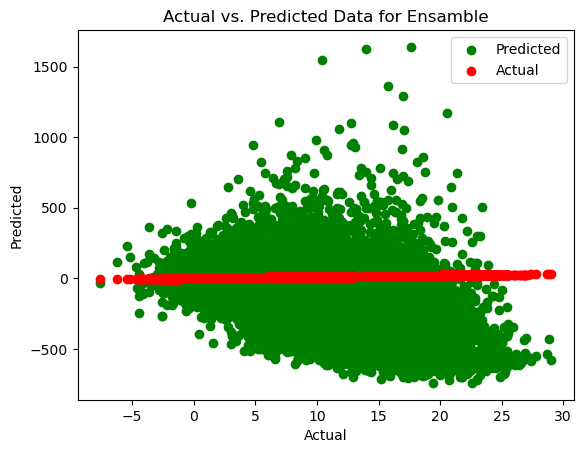

In [93]:
import matplotlib.pyplot as plt


plt.scatter(y, predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for Ensamble')


plt.legend()


plt.show()


### SVR without Parameter

In [94]:
svm=SVR()

In [95]:
svm.fit(X,y)

SVR()

In [96]:
svm.score(X,y)

0.0016092661728002167

In [97]:
prsvm = Regressor.predict(X)

In [98]:
mae = mean_absolute_error(y, prsvm)
print("MAE:", mae)

MAE: 1.1438330002614352


In [99]:
# Calculate RMSE
rmse = mean_squared_error(y, prsvm)
print("RMSE:", rmse)

RMSE: 2.08937797525609


In [100]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = svm.predict(input)[0]

  return str(prediction)

In [101]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'10.873551999863663'

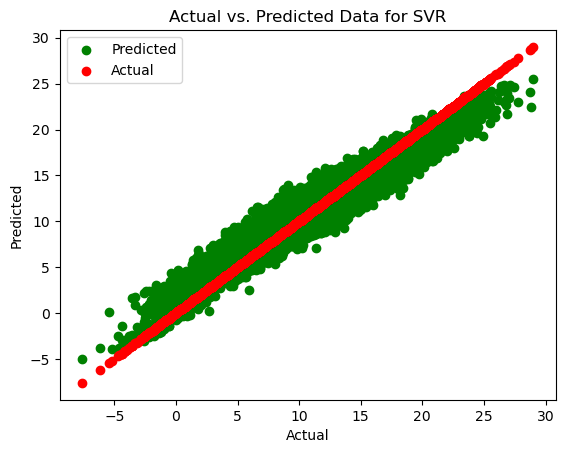

In [102]:
import matplotlib.pyplot as plt


plt.scatter(y, prsvm, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for SVR')


plt.legend()


plt.show()


### SVR with Parameter

In [103]:
svmp=SVR(kernel='linear')

In [104]:
svmp.fit(X,y)

SVR(kernel='linear')

In [105]:
svmp.score(X,y)

-55911.55005764094

In [106]:
rsvm = Regressor.predict(X)

In [107]:
mae = mean_absolute_error(y, rsvm)
print("MAE:", mae)

MAE: 1.1438330002614352


In [108]:
# Calculate RMSE
rmse = mean_squared_error(y, rsvm)
print("RMSE:", rmse)

RMSE: 2.08937797525609


In [109]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):
 
  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = svmp.predict(input)[0]

  return str(prediction)

In [110]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-536.9158347279808'

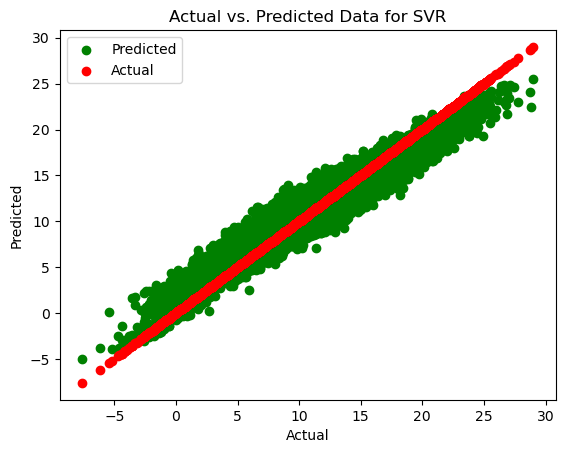

In [111]:
import matplotlib.pyplot as plt


plt.scatter(y, rsvm, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for SVR')


plt.legend()


plt.show()


### Feature Selection

### Linear 

In [112]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

data = pd.read_csv('london_weather.csv')

features = ['cloud_cover', 'sunshine', 'global_radiation', 'precipitation', 'pressure', 'snow_depth']
target = 'mean_temp'
X = data[features]
y = data[target]

data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]

imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
selector = SelectKBest(score_func=f_regression, k=3) 
X_selected = selector.fit_transform(X_imputed, y)

model = LinearRegression()

model.fit(X_selected, y)

predictions = model.predict(X_selected)

mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.2980478611373614
Root Mean Squared Error (RMSE): 4.103791139420477


### Random Forest 

In [113]:




data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)  
X_selected = selector.fit_transform(X_imputed, y)

model = RandomForestRegressor()

model.fit(X_selected, y)

predictions = model.predict(X_selected)

mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.9829615122259558
Root Mean Squared Error (RMSE): 2.582956869870012


### Decission Tree

In [114]:


data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]

imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)  
X_selected = selector.fit_transform(X_imputed, y)


model = DecisionTreeRegressor()
model.fit(X_selected, y)


predictions = model.predict(X_selected)


mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.4393797483070483
Root Mean Squared Error (RMSE): 2.3457448238893295


### Adaboost

In [115]:


data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]


imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)  
X_selected = selector.fit_transform(X_imputed, y)


model = AdaBoostRegressor()


model.fit(X_selected, y)


predictions = model.predict(X_selected)


mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.342097185788054
Root Mean Squared Error (RMSE): 4.083616261064036


### SVR

In [116]:

data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
selector = SelectKBest(score_func=f_regression, k=3)  
X_selected = selector.fit_transform(X_imputed, y)
model = SVR(kernel='linear')
model.fit(X_selected, y)
predictions = model.predict(X_selected)
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.2892326887103587
Root Mean Squared Error (RMSE): 4.11402088844729


### Explore The Data

In [117]:
import plotly 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import calendar   

#### Heatmap for all data

<AxesSubplot:>

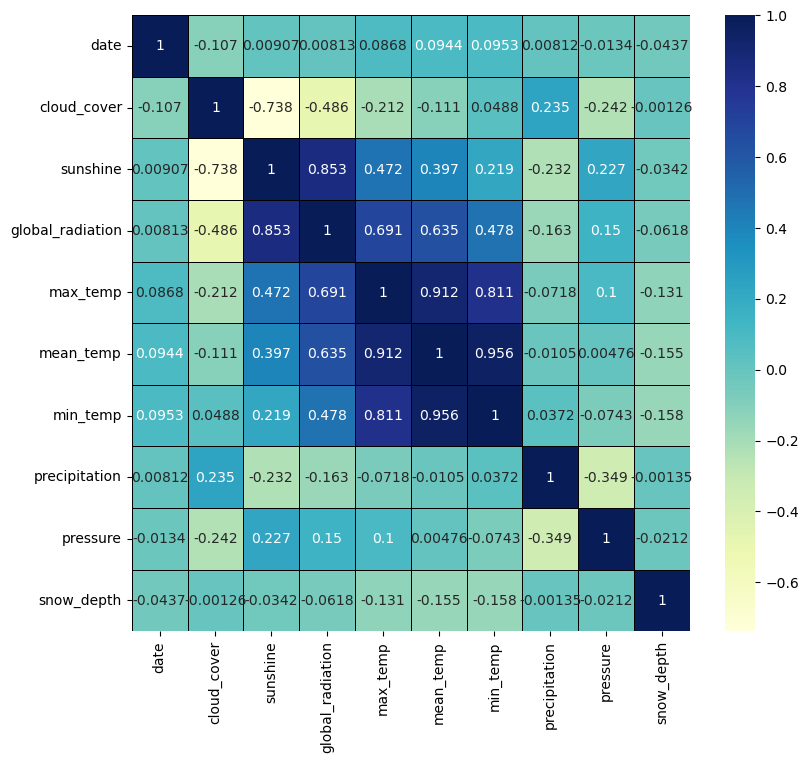

In [118]:
plt.figure(figsize=(9,8))
sns.heatmap(d1.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)

### Heatmap for particular data

<AxesSubplot:>

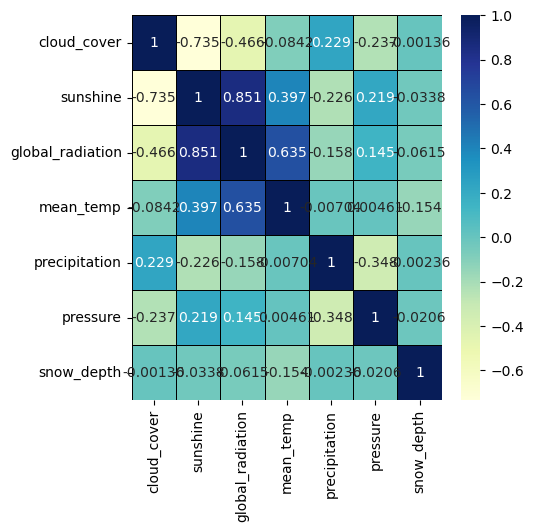

In [119]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)



#### Snow depth graph 1979-2020

In [120]:
d1['year'] = d1['date'].astype(str).str[:4]
d1['month'] = d1['date'].astype(str).str[4:6]
d1['date'] = d1['date'].astype(str).str[6:]

In [121]:
d1[['date', 'month', 'year']] = d1[['date', 'month', 'year']].astype(int)

In [122]:
weather_features = d1.select_dtypes(exclude = 'object').columns

In [123]:
london_weather_monthly_df = d1.groupby(['year', 'month'], as_index = False)[weather_features].mean()
london_weather_monthly_df['snow_depth'] = d1.snow_depth.fillna(0)
london_weather_monthly_df['date'] = pd.to_datetime(london_weather_monthly_df[['year', 'month']].assign(DAY = 1))
monthly_data_df1 = london_weather_monthly_df.copy()
monthly_data_df1.month = monthly_data_df1['month'].astype(int)
monthly_data_df1['month'] = monthly_data_df1['month'].apply(lambda x: calendar.month_abbr[x])

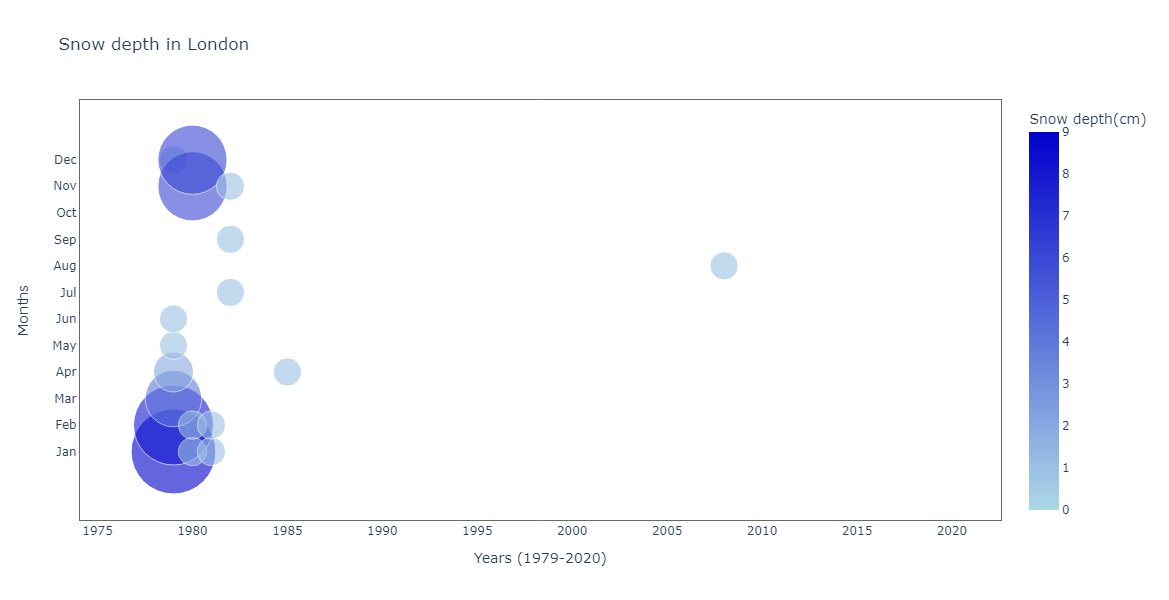

In [124]:
fig = px.scatter(monthly_data_df1, x="year", y="month", color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
	         size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Years (1979-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Months', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Snow depth(cm)'))
fig.show()

#### Maximum Minimum and Mean Temparature Graph

In [125]:

london_weather_yearly_df = london_weather_monthly_df.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp']].mean()


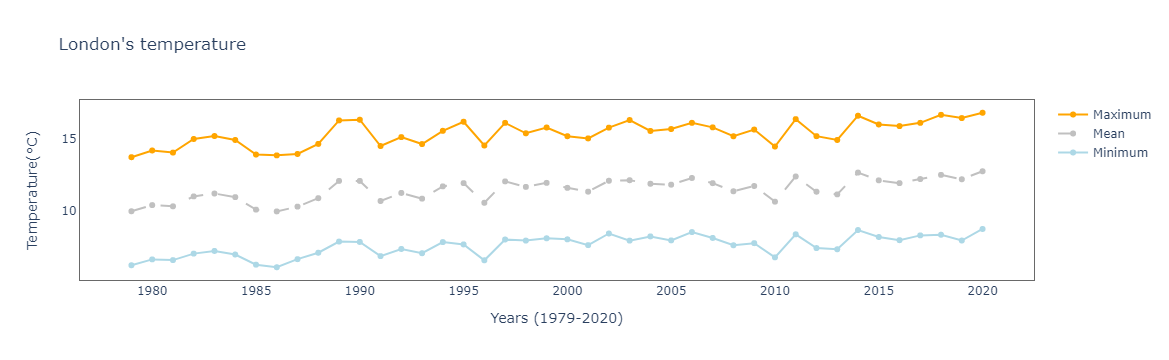

In [126]:
layout = go.Layout(
    title = "London's temperature",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years (1979-2020)",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),yaxis=dict(
        title = "Temperature(°C)",  
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.max_temp,
    name = 'Maximum',
    mode = 'lines+markers',
    line_color = 'orange'),
    go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.mean_temp,
    name = 'Mean',
        mode = 'lines+markers',
    line = dict(color = 'silver', dash = 'longdash')),
    go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.min_temp,
    name = 'Minimum',
    mode = 'lines+markers',
    line_color = 'lightblue')
    ],
    layout = layout)
plot.show()

### London's Cloud Cover Status(1979-2020)

In [127]:
london_clouds = dict()
london_clouds['Barely cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([0,1,2])].count()
london_clouds['Partly cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([3,4,5])].count()
london_clouds['Mostly cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([6,7,8])].count()
london_clouds['Obstructed view'] = d1['cloud_cover'][d1['cloud_cover'] == 9].count()

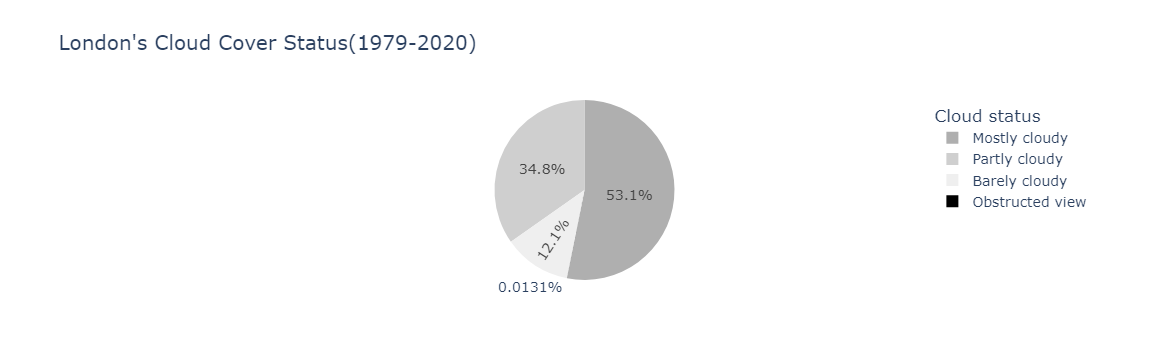

In [128]:
fig = px.pie(values=list(london_clouds.values()), names=list(london_clouds.keys()), 
              title = "London's Cloud Cover Status(1979-2020)",
              color_discrete_sequence=['#afafaf', '#cfcfcf', '#efefef', '#000000'])
fig.update_layout(width = 700, legend_title_text = 'Cloud status', font = dict(size = 14))
fig.show()

### # Top 5 hottest years

In [129]:
df = pd.read_csv('london_weather.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [130]:


df[['year','max_temp']].groupby('year').mean().sort_values(by='max_temp', ascending=False).head(5)

max_temp
year           
2020  16.787778
2018  16.718630
2014  16.626575
2019  16.450137
2011  16.379726

### Top 10 lowest temp

In [131]:

df[['date', 'max_temp']].sort_values(['max_temp'],ascending=True).head(10)

date  max_temp
2932 1987-01-11      -6.2
2206 1985-01-15      -4.0
4419 1991-02-06      -3.4
2933 1987-01-12      -3.3
2931 1987-01-10      -3.0
4421 1991-02-08      -2.5
4420 1991-02-07      -2.1
2231 1985-02-09      -1.8
1102 1982-01-07      -1.8
6574 1996-12-31      -1.7

### Number of days a year without rain

In [132]:
df[df['precipitation'] == 0].groupby('year').count().precipitation.sort_values(ascending=False).head(10).to_frame()

precipitation
year               
1990            229
1997            216
1995            216
1996            215
1991            214
2003            212
1989            212
2018            210
1993            201
1983            199

### Snow depth - change between 1979 and 2020

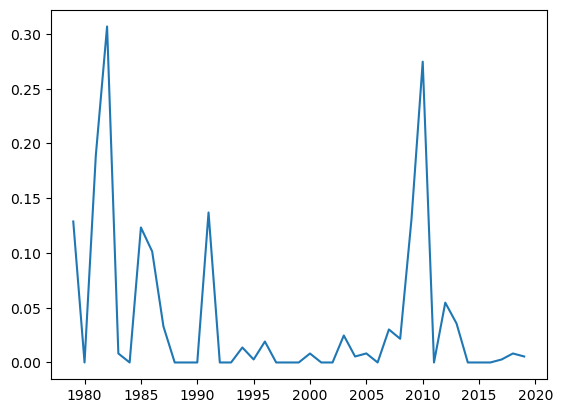

In [133]:
df.groupby('year').mean().snow_depth

plt.plot(df.groupby('year').mean().snow_depth.index, df.groupby('year').mean().snow_depth.values)
plt.show()

### Hotwaves

In [134]:

df[['date', 'max_temp']].sort_values(['max_temp'],ascending=False).head(5)

date  max_temp
14814 2019-07-24      37.9
8986  2003-08-09      37.9
15187 2020-07-31      37.9
13329 2015-06-30      36.7
15194 2020-08-07      36.5